# Chapter 7 — Thermodynamics (MEDPHYS 1A03)

**How to use this notebook**
- Run cells from top to bottom (**Shift+Enter**).
- You do **not** need prior coding experience. Most activities are “change one number, rerun, interpret the plot”.
- If you get an error: read the **last line** of the red traceback first, then check for typos.

---

## Learning objectives (from the textbook chapter)

By the end of this notebook, you should be able to:

1. Explain the laws of thermodynamics and their relation to **heat, work, and energy**.
2. Define **entropy** and describe its role in **spontaneous and irreversible** processes.
3. Apply **Carnot efficiency** to evaluate limits of energy conversion.
4. Relate thermodynamic principles to **metabolism and homeostasis**.
5. Describe heat transfer and **temperature regulation** in the human body.

*(You’ll practice these using simple computations and plots.)*


In [ ]:
# Notebook setup (run this cell first)
import numpy as np
import matplotlib.pyplot as plt

# Make plots show up in the notebook
%matplotlib inline

print("✅ Imports successful: numpy + matplotlib")


✅ Imports successful: numpy + matplotlib


## Part 1 Systems, state variables, and temperature (Zeroth Law)

In thermodynamics we define:
- **System**: the part of the world we study
- **Surroundings**: everything else
- **Boundary**: real or imaginary surface separating them

A **closed** system has fixed mass (no mass crosses the boundary).  
An **open** system allows mass flow (common in physiology: lungs, blood vessels, etc.).

### Zeroth Law (why thermometers work)
If object A is in thermal equilibrium with object C, and object B is also in thermal equilibrium with C,
then A and B are in thermal equilibrium with each other.  
That lets a thermometer (C) define a consistent temperature scale.


### Mini-model: Mixing hot and cold water (energy conservation intuition)

This is **not** a full thermodynamics derivation (and ignores heat loss to the cup/air),
but it reinforces the idea that *temperature is an energy bookkeeping variable*.

We assume:
- both are water (same specific heat)
- no heat lost to surroundings
- final temperature is a weighted average by mass


In [ ]:
# Try changing these values and re-run
m_hot = 0.25   # kg of hot water
T_hot = 60.0   # °C
m_cold = 0.20  # kg of cold water
T_cold = 10.0  # °C

T_final = (m_hot*T_hot + m_cold*T_cold) / (m_hot + m_cold)

print(f"Final equilibrium temperature ≈ {T_final:.1f} °C")


Final equilibrium temperature ≈ 37.8 °C


## Part 2 - First Law: energy conservation in thermodynamic form

A common sign convention in chemistry/biology is:

$$
\Delta U = Q - W
$$

- $\Delta U$: change in **internal energy** of the system  
- $Q$: **heat** added to the system  
- $W$: **work** done *by* the system  

### PV-work (work associated with volume change)

For a gas (or any pressure–volume system), a small amount of mechanical work is:

$$
\mathrm{d}w = -P\,\mathrm{d}V
$$

- If the system **expands** ($\mathrm{d}V>0$), then $\mathrm{d}w<0$: the system does work on surroundings.  
- If the system **compresses** ($\mathrm{d}V<0$), then $\mathrm{d}w>0$: surroundings do work on system.


### Visualizing work as *area under a curve* on a PV diagram

For a process from $V_1$ to $V_2$,
$$
w = -\int_{V_1}^{V_2} P(V)\, dV
$$

Below, you’ll compute work for a few common processes:
- **Isobaric**: constant pressure
- **Isochoric**: constant volume (no PV-work)
- **Isothermal (ideal gas)**: constant temperature, $P(V)=\frac{nRT}{V}$


Work (PV) with sign convention ΔU = q + w (w is work ON system)
  Isobaric:   w = -1,000 J
  Isochoric:  w = 0 J
  Isothermal: w = -1,729 J


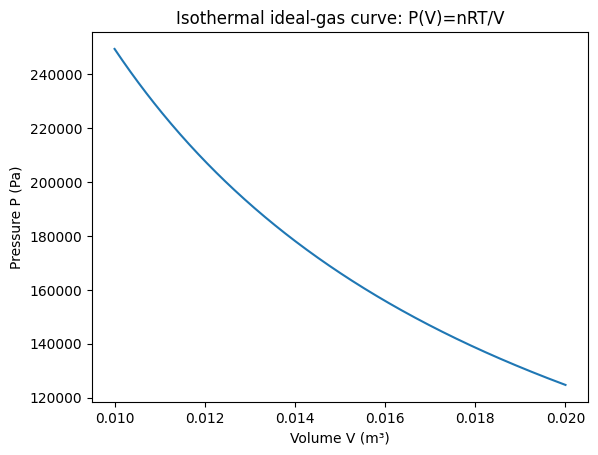

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for an ideal gas example
R = 8.314  # J/(mol·K)
n = 1.0    # mol
T = 300.0  # K

V1 = 0.010  # m^3
V2 = 0.020  # m^3

# --- Isobaric process ---
P_const = 100_000  # Pa (about 1 atm)

w_isobaric = -P_const * (V2 - V1)  # J

# --- Isochoric process ---
w_isochoric = 0.0

# --- Isothermal (ideal gas): P(V) = nRT/V ---
V = np.linspace(V1, V2, 400)
P_isoT = n * R * T / V
# numerical integral for work
w_isothermal = -np.trapezoid(P_isoT, V)

print("Work (PV) with sign convention ΔU = q + w (w is work ON system)")
print(f"  Isobaric:   w = {w_isobaric:,.0f} J")
print(f"  Isochoric:  w = {w_isochoric:,.0f} J")
print(f"  Isothermal: w = {w_isothermal:,.0f} J")

# Plot PV curve for the isothermal case
plt.figure()
plt.plot(V, P_isoT)
plt.xlabel("Volume V (m³)")
plt.ylabel("Pressure P (Pa)")
plt.title("Isothermal ideal-gas curve: P(V)=nRT/V")
plt.show()


### Check your understanding (conceptual)

1. During **expansion** (V increases), is PV-work positive or negative under our convention?
2. Why is PV-work **zero** for an isochoric process?
3. Which process (isobaric vs isothermal) produced a **larger magnitude** of work here? Why?


## Part 3 - Second Law: entropy and the arrow of time

The First Law says energy is conserved, but it does **not** tell you *which direction* a process will occur.

The **Second Law** introduces **entropy** $S$. A common statement:

> The total entropy of an isolated system can never decrease.

A simple thermodynamic definition (for a reversible transfer) is:

$$
\Delta S = \frac{q_{rev}}{T}
$$

- Entropy has units of **J/K**
- Heat flowing from **hot → cold** increases total entropy
- Many real processes are **irreversible** (entropy production > 0)


### Simple entropy bookkeeping: heat flow from hot to cold

Suppose an amount of heat $q$ leaves a hot object at temperature $T_h$ and enters a cold object at $T_c$.
Treat each as a reservoir at constant temperature.

$$
\Delta S_{hot} = -\frac{q}{T_h}, \quad \Delta S_{cold} = +\frac{q}{T_c}
$$

Total:
$$
\Delta S_{total} = q\left(\frac{1}{T_c} - \frac{1}{T_h}\right)
$$
If $T_h > T_c$, this is positive.


In [ ]:
# Try changing q, Th, Tc (remember: Kelvin!)
q = 500.0     # J of heat transferred
Th = 350.0    # K (hot reservoir)
Tc = 300.0    # K (cold reservoir)

dS_hot  = -q/Th
dS_cold =  q/Tc
dS_total = dS_hot + dS_cold

print(f"ΔS_hot   = {dS_hot: .3f} J/K")
print(f"ΔS_cold  = {dS_cold: .3f} J/K")
print(f"ΔS_total = {dS_total: .3f} J/K")

if dS_total > 0:
    print("✅ Total entropy increases → spontaneous direction is hot → cold")
else:
    print("⚠️ Total entropy did not increase (check your temperatures)")


ΔS_hot   = -1.429 J/K
ΔS_cold  =  1.667 J/K
ΔS_total =  0.238 J/K
✅ Total entropy increases → spontaneous direction is hot → cold


### Irreversibility intuition (why you can't get all heat back as work)

- **Work** is “ordered” energy transfer (force through a distance).
- **Heat** is energy in **random molecular motion**.

Reversing random molecular motion into perfectly ordered motion is extraordinarily unlikely,
so complete conversion of heat into work cannot occur spontaneously.


## Carnot cycle and the maximum possible efficiency

A **Carnot engine** is a theoretical heat engine operating reversibly between:
- Hot reservoir at temperature $T_h$
- Cold reservoir at temperature $T_c$

Its maximum efficiency is:

$$
\eta_{Carnot} = 1 - \frac{T_c}{T_h}
$$

This sets a *hard upper bound* for any real heat engine operating between those temperatures.


Carnot efficiency η = 0.500  (50.0%)


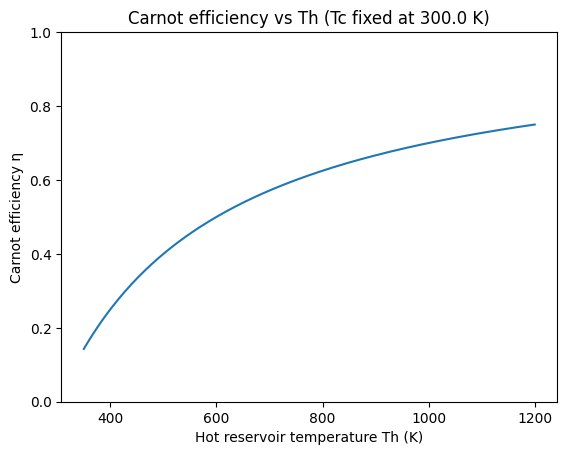

In [ ]:
# Carnot efficiency calculator (temperatures MUST be Kelvin)
Th = 600.0  # K
Tc = 300.0  # K

eta = 1 - (Tc/Th)

print(f"Carnot efficiency η = {eta:.3f}  ({eta*100:.1f}%)")

# Explore how efficiency changes with Tc and Th
Th_vals = np.linspace(350, 1200, 200)
Tc_fixed = 300.0
eta_curve = 1 - (Tc_fixed/Th_vals)

plt.figure()
plt.plot(Th_vals, eta_curve)
plt.xlabel("Hot reservoir temperature Th (K)")
plt.ylabel("Carnot efficiency η")
plt.title(f"Carnot efficiency vs Th (Tc fixed at {Tc_fixed} K)")
plt.ylim(0, 1)
plt.show()


## Part 4 - Heat and Life: metabolism, homeostasis, and efficiency

Living organisms are **not** isolated systems. They constantly exchange:
- matter (food, oxygen, CO₂, water)
- energy (heat loss, mechanical work)

A useful (simplified) *steady-state* energy balance is:

$$
\text{Energy in (food)} \approx \text{Work out} + \text{Heat out}
$$

Muscle efficiency is often ~20–30% depending on conditions, meaning much of chemical energy becomes heat.

Below you’ll do a toy calculation connecting **power**, **time**, and **energy**.


In [ ]:
# A toy metabolism/efficiency calculation

# Suppose someone is doing mechanical work at constant power:
P_mech = 150.0      # W (J/s) mechanical output (e.g., cycling)
t = 30 * 60         # seconds (30 minutes)

# Assume an efficiency (fraction of chemical energy converted to mechanical work)
efficiency = 0.25   # 25%

E_mech = P_mech * t
E_chem = E_mech / efficiency

# Convert to dietary Calories (kcal): 1 kcal = 4184 J
kcal = E_chem / 4184

print(f"Mechanical energy output: {E_mech/1000:.1f} kJ")
print(f"Estimated chemical energy required: {E_chem/1000:.1f} kJ")
print(f"≈ {kcal:.0f} kcal of chemical energy")


Mechanical energy output: 270.0 kJ
Estimated chemical energy required: 1080.0 kJ
≈ 258 kcal of chemical energy


### Temperature regulation (conceptual link)

Humans regulate core temperature (~37 °C) by balancing heat generation and heat loss:
- **Heat generation**: metabolism, muscle activity (shivering)
- **Heat loss**: convection, radiation, evaporation, conduction

Thermodynamics tells you:
- energy must be conserved (First Law),
- but not all energy can be converted to useful work (Second Law),
- and temperature differences set limits on energy conversion (Carnot limit).


## Extension (optional): “Efficiency ceiling” thought experiment

Imagine the body as an engine that turns chemical energy into mechanical work.
Even if it were a perfect heat engine between:
- $T_h =$ core temperature
- $T_c =$ environment

the Carnot efficiency would be:

$$
\eta = 1 - T_c/T_h
$$

Try it with realistic temperatures below. What do you notice?


In [ ]:
# Temperatures near body temperature must be in Kelvin.
# Core temperature ~37°C -> 310 K
Th = 310.0  # K
Tc = 295.0  # K (about 22°C indoor)

eta = 1 - Tc/Th
print(f"Carnot efficiency between {Th:.0f} K and {Tc:.0f} K: {eta*100:.2f}%")

print("\nReflection:")
print("- This Carnot limit is surprisingly low when Th and Tc are close.")
print("- That helps explain why heat engines require large temperature differences for high efficiency.")


Carnot efficiency between 310 K and 295 K: 4.84%

Reflection:
- This Carnot limit is surprisingly low when Th and Tc are close.
- That helps explain why heat engines require large temperature differences for high efficiency.


---
## 🧍‍♂️ Part 5 - Thermodynamics in the Body: Temperature Regulation (Thermoregulation)

The **First Law of Thermodynamics** (energy conservation) is extremely useful for modeling body temperature:

$$
\frac{dU}{dt} = \dot{Q}_{in} - \dot{Q}_{out} + \dot{W}_{in} - \dot{W}_{out}
$$

For body temperature regulation, we often simplify to an **energy balance** on the body core:

$$\frac{dT_{core}}{dt} = \dot{Q}_{met} - \dot{Q}_{loss}
$$

Where:
- $C$ is an effective heat capacity (J/°C)
- $T_{core}$ is core temperature (°C)
- $\dot{Q}_{met}$ is metabolic heat production (W)
- $\dot{Q}_{loss}$ is heat loss to the environment (W)

Below, we’ll build a simple, interpretable model of heat loss by:
- **Conduction** through skin + fat layers
- **Convection** from skin to air

We’ll simulate **temperature vs time**, and (optionally) use sliders to explore conditions.


## Part 6 — Heat Loss Pathway: Layers + Convection (Thermal Resistances)

A helpful engineering model is to represent heat transfer as **thermal resistances** in series:

- Conduction resistance of a layer:
$$
R_{cond} = \frac{L}{kA}
$$
- Convection resistance at the surface:
$$
R_{conv} = \frac{1}{hA}
$$

If we treat core temperature as $T_{core}$ and ambient temperature as $T_{env}$,
then the heat loss rate can be approximated by:

$$
\dot{Q}_{loss} = \frac{T_{core} - T_{env}}{R_{total}}
$$
with
$$
R_{total} = R_{fat} + R_{skin} + R_{conv}
$$

This is a **simplified model** (real physiology includes blood flow regulation, sweating, radiation, etc.), but it is great for intuition.


In [3]:
# --- Parameters you can change ---
T_core = 37.0        # °C (core temperature)
T_env = 20.0         # °C (ambient temperature)

A = 1.8              # m^2 (effective surface area)
Q_met = 90.0         # W  (resting metabolic heat production, order of magnitude)

# Layer thicknesses (m)
L_fat  = 0.010       # 1 cm fat
L_skin = 0.002       # 2 mm skin

# Thermal conductivities (W/m/K)
k_fat  = 0.20
k_skin = 0.37

# Convection coefficient (W/m^2/K)  (still air ~5-10; moving air can be higher)
h = 8.0

# --- Compute thermal resistances ---
R_fat  = L_fat  / (k_fat  * A)
R_skin = L_skin / (k_skin * A)
R_conv = 1.0    / (h      * A)

R_total = R_fat + R_skin + R_conv

R_fat, R_skin, R_conv, R_total

(0.027777777777777776,
 0.003003003003003003,
 0.06944444444444445,
 0.10022522522522523)

In [4]:
# Heat loss rate for these conditions (W)
Q_loss = (T_core - T_env) / R_total
Q_loss

169.61797752808988

### Interpretation

- Increasing **fat thickness** increases $R_{fat}$ → reduces heat loss
- Increasing **air movement** increases $h$ → decreases $R_{conv}$ → increases heat loss
- Lower **environment temperature** increases the driving temperature difference → increases heat loss

**Try this:** change `T_env`, `L_fat`, or `h` and re-run.


---
## Part 7 — Temperature vs Time (Simple Energy Balance)

We now simulate how core temperature changes over time:

$$\frac{dT}{dt} = \dot{Q}_{met} - \dot{Q}_{loss}(T)
$$

We’ll model $\dot{Q}_{loss}(T)$ using the thermal resistance model:

$$
\dot{Q}_{loss}(T) = \frac{T - T_{env}}{R_{total}}
$$

This produces a **temperature vs time** curve.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

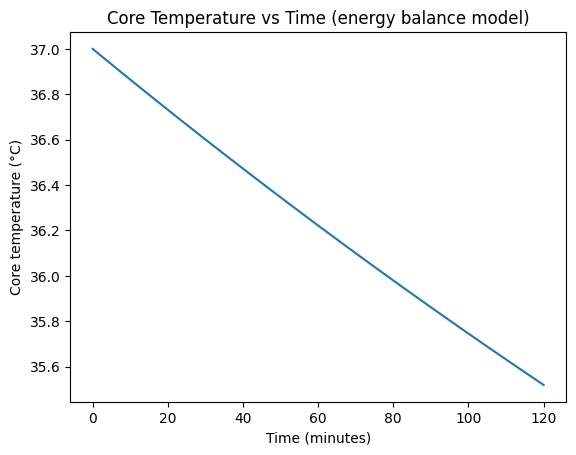

35.51910750950395


In [5]:
# --- Simulation controls ---
C = 3.5e5        # J/°C (effective heat capacity; order-of-magnitude for whole body)
T0 = 37.0        # initial core temperature (°C)

dt = 10          # seconds
t_end = 2*60*60  # 2 hours
times = np.arange(0, t_end + dt, dt)

# Use the R_total computed above. (Re-run earlier cells if you change parameters.)
T = np.zeros_like(times, dtype=float)
T[0] = T0

for i in range(1, len(times)):
    Q_loss_i = (T[i-1] - T_env) / R_total
    dTdt = (Q_met - Q_loss_i) / C
    T[i] = T[i-1] + dTdt * dt

# Plot
plt.plot(times/60, T)
plt.xlabel("Time (minutes)")
plt.ylabel("Core temperature (°C)")
plt.title("Core Temperature vs Time (energy balance model)")
plt.show()

print(T[-1]) # print last index

### Try this
1. Lower `T_env` (e.g., 5 °C) and re-run: does core temperature drop faster?
2. Increase `h` (windy conditions): what changes?
3. Increase `L_fat` (insulation): what changes?

This model is intentionally simple, but it captures a key thermodynamics idea:
> **Temperature change depends on the net power imbalance** (W) and heat capacity (J/°C).


---
## Part 8 — Temperature Gradient Across Skin and Fat (Steady-State)

We can estimate the **temperature profile** across layers when the system is near steady-state.

If $\dot{Q}$ is the heat flow (W), then the temperature drop across a layer is:

$$
\Delta T = \dot{Q}\,R
$$

We’ll use the heat loss rate computed from the resistance model to estimate:
- $T_{core}$
- temperature at the fat/skin interface
- skin surface temperature
- ambient temperature


In [6]:
# Use the (approx) steady heat loss based on current T_core
Qdot = (T_core - T_env) / R_total

T_core_est = T_core
T_after_fat  = T_core_est - Qdot * R_fat
T_after_skin = T_after_fat  - Qdot * R_skin
T_surface    = T_after_skin
T_ambient    = T_env

print("T_core_est:", T_core_est)
print("T_after_fat:", T_after_fat)
print("T_surface:", T_surface)
print("T_ambient:", T_ambient)

T_core_est: 37.0
T_after_fat: 32.28838951310861
T_surface: 31.779026217228463
T_ambient: 20.0


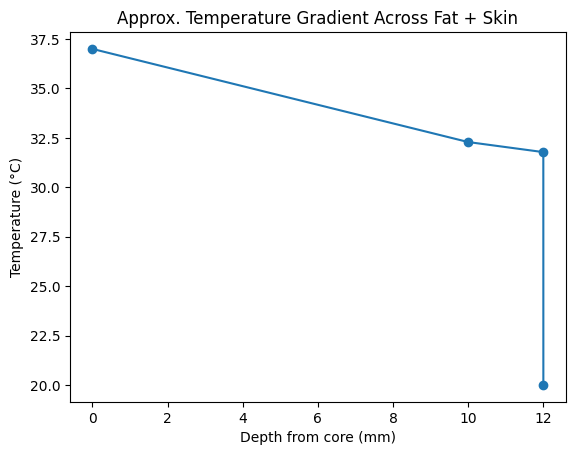

In [7]:
# Plot a simple temperature profile across "depth"
# Define positions (m): 0 = core, L_fat = end of fat, L_fat+L_skin = skin surface
x = [0, L_fat, L_fat + L_skin, L_fat + L_skin + 1e-6]
T_profile = [T_core_est, T_after_fat, T_surface, T_ambient]

plt.plot([xi*1000 for xi in x], T_profile, marker='o')
plt.xlabel("Depth from core (mm)")
plt.ylabel("Temperature (°C)")
plt.title("Approx. Temperature Gradient Across Fat + Skin")
plt.show()

**Try this:** increase `L_fat` and re-run.  
Notice how a thicker insulating layer increases the temperature drop across fat and keeps the surface warmer.


---
## ⭐ Optional: Interactive Sliders (Pre-filled)

If sliders work in your environment, they are a great way to explore parameter sensitivity.
If not, you can skip this section (everything above still works).

If you get an error about `ipywidgets`, run the install cell once.


In [8]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Optional advanced: interactive exploration with sliders
import numpy as np
import math

try:
    from ipywidgets import interact, FloatSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

def simulate_core_temperature(T_env=20.0, h=8.0, L_fat_mm=10.0, minutes=120.0):
    # Fixed parameters
    A = 1.8
    gC = 3.5e5
    Q_met = 90.0
    k_fat, k_skin = 0.20, 0.37
    L_skin = 0.002
    L_fat = L_fat_mm / 1000.0

    R_fat = L_fat / (k_fat * A)
    R_skin = L_skin / (k_skin * A)
    R_conv = 1.0 / (h * A)
    R_total = R_fat + R_skin + R_conv

    dt = 10.0
    t_end = minutes * 60.0
    t = np.arange(0, t_end + dt, dt)
    T = np.zeros_like(t)
    T[0] = 37.0

    for i in range(1, len(t)):
        Q_loss = (T[i-1] - T_env) / R_total
        dTdt = (Q_met - Q_loss) / gC
        T[i] = T[i-1] + dTdt * dt

    plt.figure()
    plt.plot(t/60, T)
    plt.xlabel("Time (minutes)")
    plt.ylabel("Core temperature (°C)")
    plt.title("Core temperature vs time (interactive)")
    plt.ylim(30, 40)
    plt.show()

try:
    interact(
        simulate_core_temperature,
        T_env=FloatSlider(min=-10, max=35, step=1, value=20, description="T_env (°C)"),
        h=FloatSlider(min=2, max=25, step=1, value=8, description="h (W/m²K)"),
        L_fat_mm=FloatSlider(min=1, max=30, step=1, value=10, description="fat (mm)"),
        minutes=FloatSlider(min=30, max=240, step=30, value=120, description="duration (min)")
    )
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(FloatSlider(value=20.0, description='T_env (°C)', max=35.0, min=-10.0, step=1.0), FloatS…

## Wrap-up checklist

Before you leave, make sure you can:

- Explain what $\Delta U = q + w$ means and identify sign conventions.
- Compute PV-work as the (negative) area under a PV curve.
- Compute entropy changes for heat flow between two reservoirs.
- Use Carnot efficiency to compute the maximum possible efficiency.
- Connect these ideas to biological energy balance and temperature regulation.

### Quick “self-test” questions
1. Why can a process be allowed by the First Law but still never occur in nature?
2. If you double $T_h$ (in Kelvin) while keeping $T_c$ fixed, what happens to $\eta_{Carnot}$?
3. Why is it hard to make an efficient engine near room temperature?